## Part 1

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import urllib.request 
import os
data_file = "airfoil.csv"
if not os.path.exists(data_file):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat", "airfoil.csv")

In [23]:
af_data = pd.read_csv('airfoil.csv', header=None, delimiter="\t")

In [24]:
headers =  ["Frequency (Hz)","Angle of Attack (degrees)","Chord Length (m)","Free-stream Velocity (m/s)","Suction Side Displacement thickness (m)","Scaled Sound Pressure Level (dB)"]
af_data.columns = headers

In [25]:
#I used code that Jose came up with right here. I attempted something else, but his seemed to work cleaner, hence why I am using his here.
def Category(x):
    if x > 130  :
        return "Dangerous"
    elif x> 120 and x<130 :
        return "Not safe"
    else:
        return"Safe"

Jose and I decided together that for this lab we should come up with a categorizing column, so as you can see above, we decided the categories based on decibel levels. 120 dB is where it becomes pretty bad for the human ear, so that was a clear cut off point. Jose wanted to do three clusters, so from there we just decided 130 dB will be the next cutoff because sound is measured on a logarithmic scale; therefore, 130 should be a big difference compared to 120.

When it comes time to do logistic regression, we will most likely just split it below and above 120 dB, but we thought three clusters would be more fun for this lab.

In [26]:
af_data['Categorized Sound Level'] = af_data.iloc[:,5]
af_data['Categorized Sound Level'] = af_data['Categorized Sound Level'].map(Category)

In [27]:
af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB),Categorized Sound Level
0,800,0.0,0.3048,71.3,0.002663,126.201,Not safe
1,1000,0.0,0.3048,71.3,0.002663,125.201,Not safe
2,1250,0.0,0.3048,71.3,0.002663,125.951,Not safe
3,1600,0.0,0.3048,71.3,0.002663,127.591,Not safe
4,2000,0.0,0.3048,71.3,0.002663,127.461,Not safe


In [28]:
# I want to normalize my data because I think it will work better for PCA
af_data_norm = af_data

af_data_norm['Frequency_normalized'] = (af_data_norm['Frequency (Hz)'] - af_data_norm['Frequency (Hz)'].min()) / (af_data_norm['Frequency (Hz)'].max() - af_data_norm['Frequency (Hz)'].min())

af_data_norm['Angle of Attack_normalized'] = (af_data_norm['Angle of Attack (degrees)'] - af_data_norm['Angle of Attack (degrees)'].min()) / (af_data_norm['Angle of Attack (degrees)'].max() - af_data_norm['Angle of Attack (degrees)'].min())

af_data_norm['Chord Length_normalized'] = (af_data_norm['Chord Length (m)'] - af_data_norm['Chord Length (m)'].min()) / (af_data_norm['Chord Length (m)'].max() - af_data_norm['Chord Length (m)'].min())

af_data_norm['Free-stream Velocity_normalized'] = (af_data_norm['Free-stream Velocity (m/s)'] - af_data_norm['Free-stream Velocity (m/s)'].min()) / (af_data_norm['Free-stream Velocity (m/s)'].max() - af_data_norm['Free-stream Velocity (m/s)'].min())

af_data_norm['Suction Side Displacement thickness_normalized'] = (af_data_norm['Suction Side Displacement thickness (m)'] - af_data_norm['Suction Side Displacement thickness (m)'].min()) / (af_data_norm['Suction Side Displacement thickness (m)'].max() - af_data_norm['Suction Side Displacement thickness (m)'].min())

af_data_norm['Scaled Sound Pressure Level_normalized'] = (af_data_norm['Scaled Sound Pressure Level (dB)'] - af_data_norm['Scaled Sound Pressure Level (dB)'].min()) / (af_data_norm['Scaled Sound Pressure Level (dB)'].max() - af_data_norm['Scaled Sound Pressure Level (dB)'].min())

del af_data_norm['Scaled Sound Pressure Level (dB)']

del af_data_norm['Suction Side Displacement thickness (m)']

del af_data_norm['Free-stream Velocity (m/s)']

del af_data_norm['Chord Length (m)']

del af_data_norm['Angle of Attack (degrees)']

del af_data_norm['Frequency (Hz)']

af_data_norm = af_data_norm[['Frequency_normalized','Angle of Attack_normalized','Chord Length_normalized','Free-stream Velocity_normalized','Suction Side Displacement thickness_normalized','Scaled Sound Pressure Level_normalized','Categorized Sound Level']]
af_data_norm.head()

,Frequency_normalized,Angle of Attack_normalized,Chord Length_normalized,Free-stream Velocity_normalized,Suction Side Displacement thickness_normalized,Scaled Sound Pressure Level_normalized,Categorized Sound Level
0,0.030303,0.0,1.0,1.0,0.039005,0.606829,Not safe
1,0.040404,0.0,1.0,1.0,0.039005,0.580238,Not safe
2,0.053030,0.0,1.0,1.0,0.039005,0.600181,Not safe
3,0.070707,0.0,1.0,1.0,0.039005,0.643790,Not safe
4,0.090909,0.0,1.0,1.0,0.039005,0.640333,Not safe


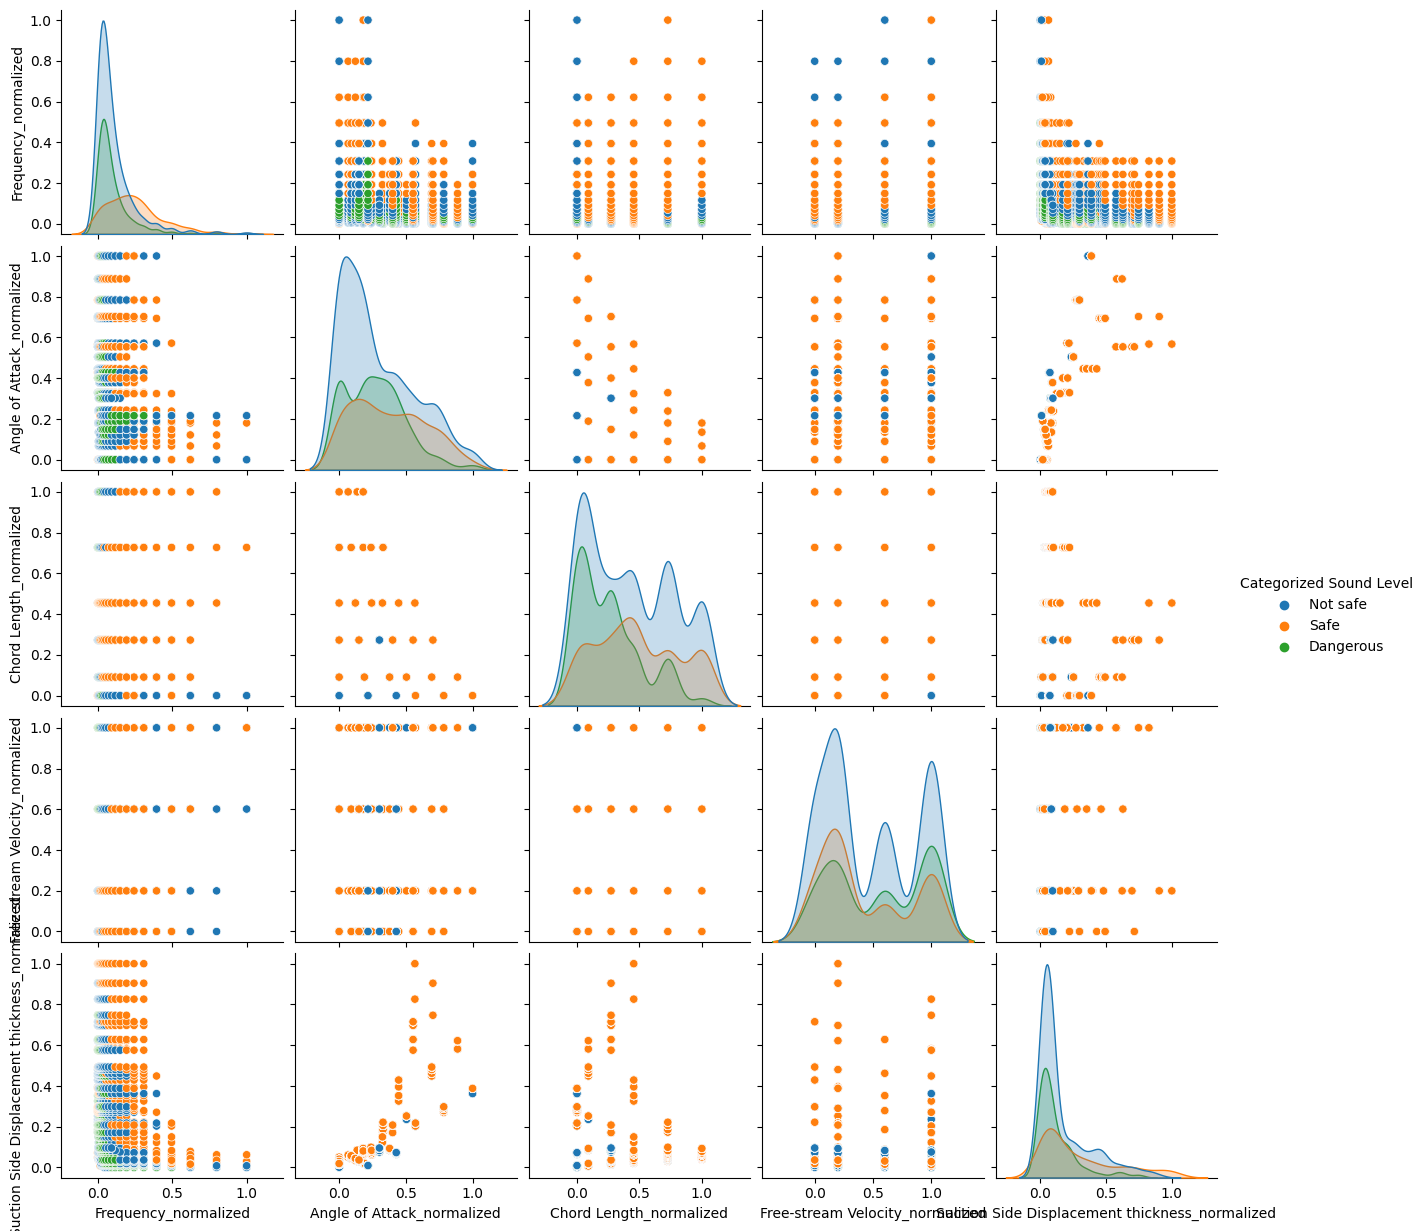

In [29]:
# I'm creating this data set to see how the categories look compared to the values that weren't used to create the categories
# because I feel that I want to see if categories arise due to only the variables
af_data_pairplot = af_data_norm.drop(columns=['Scaled Sound Pressure Level_normalized'])

sns.pairplot(af_data_pairplot, hue='Categorized Sound Level');

## Part 2

In [30]:
af_dataNumerical = af_data_pairplot.select_dtypes(include=np.number)
af_dataNumerical.head()

,Frequency_normalized,Angle of Attack_normalized,Chord Length_normalized,Free-stream Velocity_normalized,Suction Side Displacement thickness_normalized
0,0.030303,0.0,1.0,1.0,0.039005
1,0.040404,0.0,1.0,1.0,0.039005
2,0.053030,0.0,1.0,1.0,0.039005
3,0.070707,0.0,1.0,1.0,0.039005
4,0.090909,0.0,1.0,1.0,0.039005


In [31]:
from sklearn.cluster import KMeans

km = KMeans(3, init = 'random', n_init = 10)

km.fit(af_dataNumerical)

centers = km.cluster_centers_

label = km.labels_

In [32]:
af_dataNumerical['label'] = label

af_dataNumerical.head()

,Frequency_normalized,Angle of Attack_normalized,Chord Length_normalized,Free-stream Velocity_normalized,Suction Side Displacement thickness_normalized,label
0,0.030303,0.0,1.0,1.0,0.039005,0
1,0.040404,0.0,1.0,1.0,0.039005,0
2,0.053030,0.0,1.0,1.0,0.039005,0
3,0.070707,0.0,1.0,1.0,0.039005,0
4,0.090909,0.0,1.0,1.0,0.039005,0


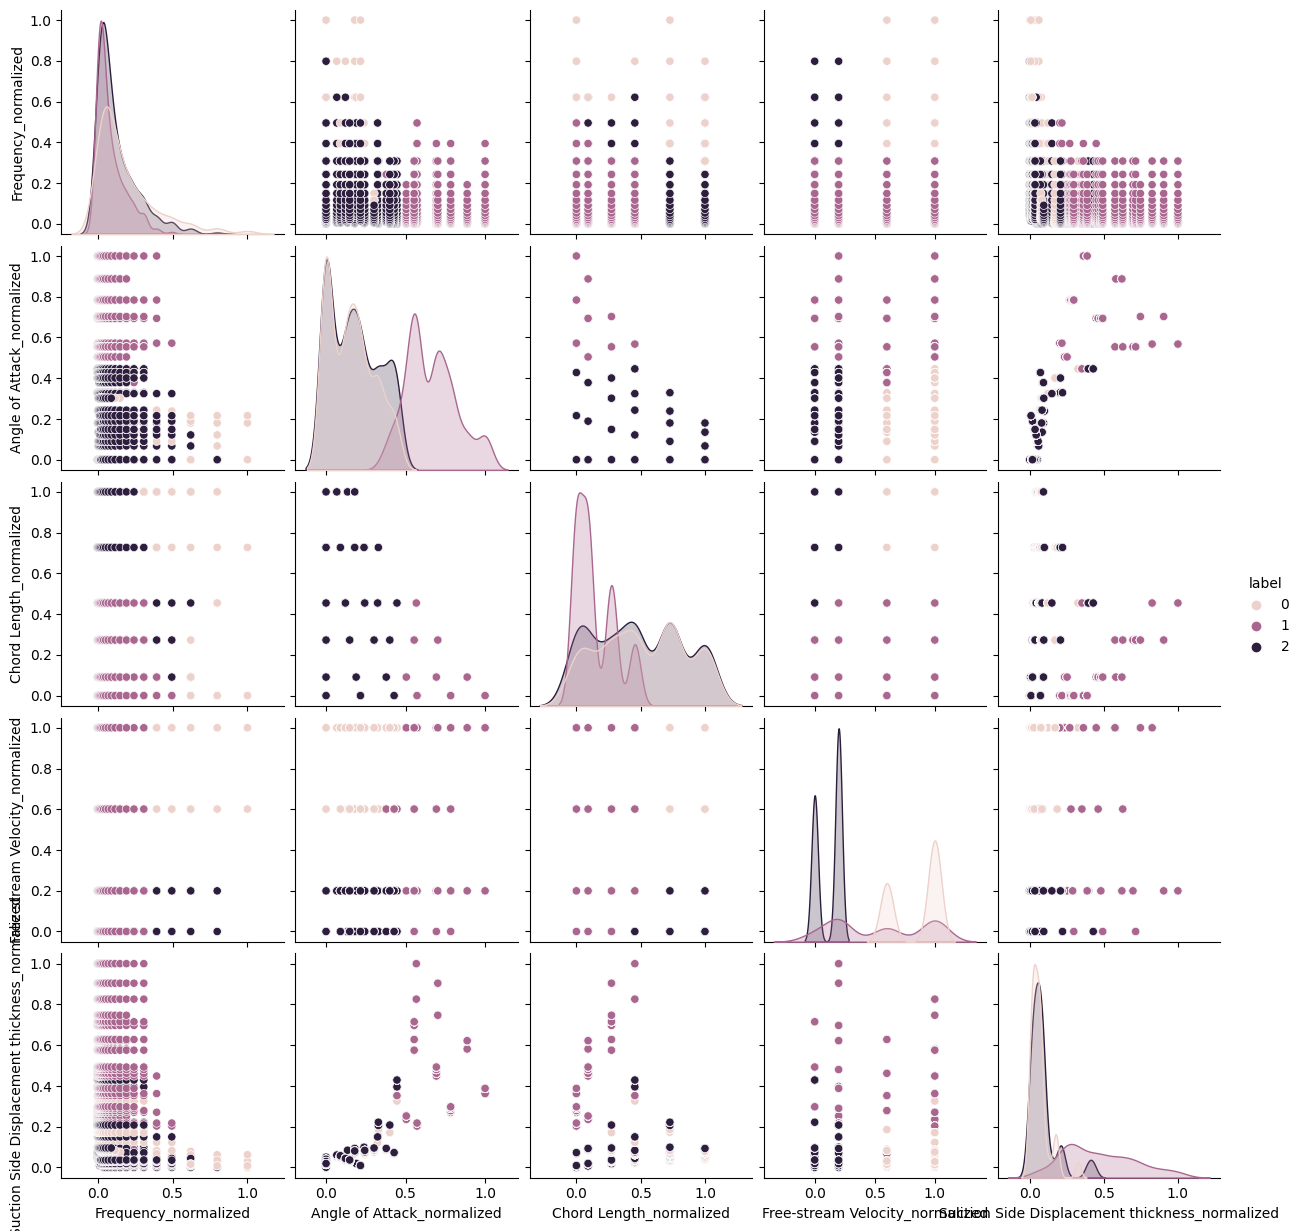

In [33]:
sns.pairplot(af_dataNumerical, hue='label');

In [34]:
from sklearn.decomposition import PCA

pca = PCA(2)

af = af_dataNumerical.drop(columns=['label'])

af = pca.fit_transform(af)

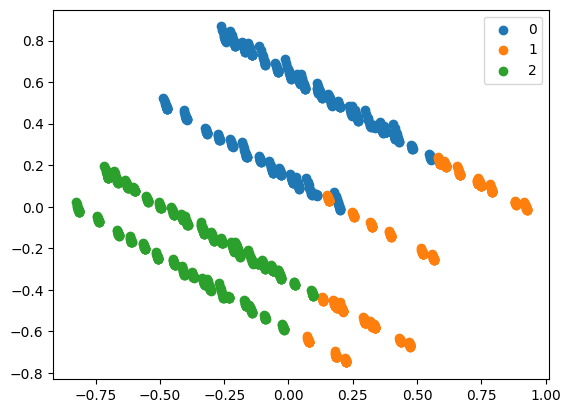

In [35]:
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(af[label == i, 0] , af[label == i, 1], label = i)
plt.legend()
plt.show()

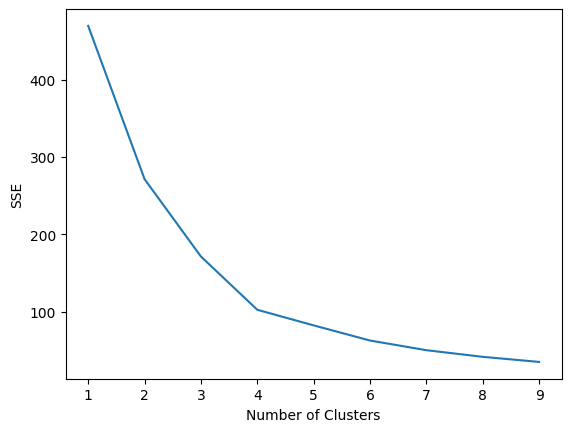

In [36]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init = 'random', n_init = 10).fit(af)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Part 3

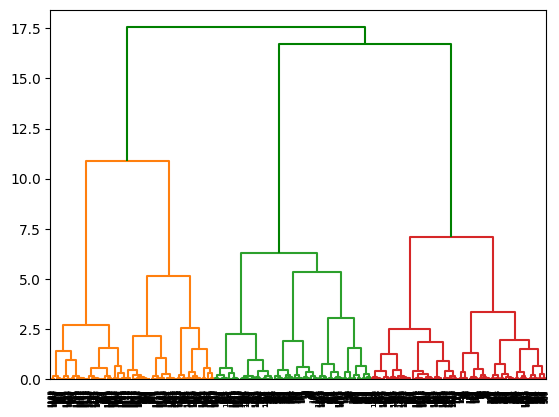

In [37]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
temp = hierarchy.linkage(af, 'ward')
plt.figure()
dn = hierarchy.dendrogram(temp, above_threshold_color="green", color_threshold = 12.5)

#### Answering the question that was asked

If you use single linkage or ward's linkage, you can notice that the distances where clusters are formed change (though not always, specifically the very first clusters are still the same). So the height of the dendrogram changes and the clusters created may have different data points if you look at the same cutting height in different dendrograms.

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.3, min_samples = 10).fit(af)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of Clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of Clusters: 3
Estimated number of noise points: 0


In [39]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps = eps, min_samples = min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = 'Paired')
    plt.title("DBSCAN")

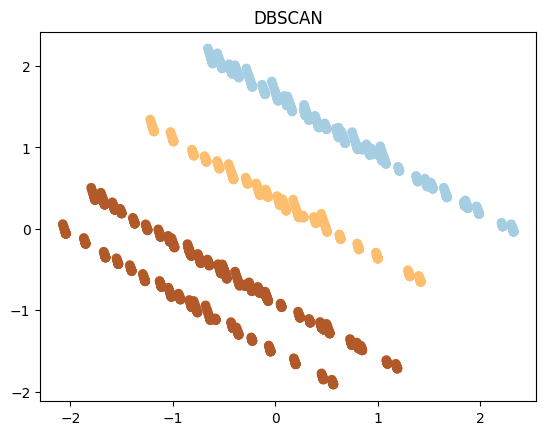

In [40]:
dbscan(af, 0.4, 10)

If I'm being fully honest, I don't know why I might not want to use DBSCAN. I do feel there could be a good way to handle clustering with this data set, though I'm not sure I have the knowledge base for handling data to do that well right now. I feel there may be a way I could use DBSCAN, but since I want to get something out of this class, I feel I should say I honestly don't really understand how to interpret my results. I understand how DBSCAN works, but I'm not sure how to look at results algorithms like PCA and DBSCAN and use them to interpret my data. Due to that, I would not like to use it for this data set.

### 1 to 2 Paragraphs

Pretty much everything in this lab was a new technique to me. Pairplot was a new function, but most of the graphs involved in it were not new to me. I eventually understood the diagonal graphs involved in pairplot, but I think I have forgotten my understanding of it. I need to think about it more to help the meaning stick better in my mind still. After the pairplot, everything was entirely new.

This semester was my first introduction into K-Means, but this class was where it was first explained. The lab itself gave me a better idea of how it works because I got to see it work first hand. 

PCA was technically used in lab 1, so I guess it isn't technically new, but this time we graphed it in 2D rather than 3D. I have a much better understanding of it now thanks to talking with Ethan and professor Darcy, but I still don't think I can look at my results and glean anything from them. I am lacking the understanding of how to interpret the PCA in a helpful manner still. The scree plot was new, but the elbow wasn't very strong (which Ethan said that means the data probably isn't good for clustering). If it's not necessarily good for clustering, then that just reinforced my idea that linear regression will be the best way to handle this data set (I guess we'll see when that lab gets here).

The dendrogram was cool. I could see how it would be helpful for deciding how many clusters you might want, but since I don't think clustering is necessarily good for this data set, I don't think I care about it much right now.

Last was DBSCAN. As I said in my answer to the question provided about DBSCAN, I understand the algorithm and what it's doing, but similar to PCA, I'm not sure how I'm supposed to interpret the data when it's being plotted. Part of that is because I don't think I understand what the code is doing to be able to graph the results. If I did, then I could probably better interpret the provided graph, but until I understand it, then I don't think I can utilize DBSCAN to the fullest.